# Let's make some nice figures

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable


import numpy as np
import pandas as pd
import xarray as xr
import math
import gsw

import mixsea as mx

In [3]:
mpl.rcParams.update({
    'font.size': 18+8,           # Default font size
    'axes.labelsize': 18+8,      # Font size for axis labels
    'axes.titlesize': 20+8,      # Font size for titles
    'xtick.labelsize': 16+8,     # Font size for x-axis ticks
    'ytick.labelsize': 16+8,     # Font size for y-axis ticks
    'legend.fontsize': 16+8,     # Font size for legend
    'figure.titlesize': 22+8     # Font size for figure titles
})

In [22]:
ADCP_2023

<xarray.Dataset>
Dimensions:  (time: 40, depth_cell: 630)
Dimensions without coordinates: time, depth_cell
Data variables:
    u        (time, depth_cell) float32 0.4301 0.4124 0.3931 ... -0.1479 -0.1369
    v        (time, depth_cell) float32 0.1997 0.223 0.2143 ... 0.03589 0.08294
    z        (time) float64 28.96 44.88 60.81 76.73 ... 602.2 618.2 634.1 650.0
    lat      (depth_cell) float64 ...

In [4]:
# Load ADCP Data
datadir = 'data/2023/adcp/'
filepath_adcp = datadir+'2023_os75nb_cleaned.nc'
ADCP_2023 = xr.open_dataset(filepath_adcp, decode_times=False)

# Load CTD Cast Data
datadir = 'data/2023/ctd/cleaned/'
filepath_P = 'P.csv' # pressure
filepath_T = 'T.csv' # temperature
filepath_S = 'S.csv' # salinity
filepath_D = 'D.csv' # density

P_2023 = pd.read_csv(datadir + filepath_P)
T_2023 = pd.read_csv(datadir + filepath_T)
S_2023 = pd.read_csv(datadir + filepath_S)
D_2023 = pd.read_csv(datadir + filepath_D)

# Load Interpolated CTD Data
datadir = 'data/2023/ctd/cleaned/interpolated dataframes/'
filepath_P_int = 'P_int.csv' # pressure
filepath_T_int = 'T_int.csv' # temperature
filepath_S_int = 'S_int.csv' # salinity
filepath_D_int = 'D_int.csv' # density
filepath_lat = 'lat_df.csv' # latitude matrix

P_int_2023 = pd.read_csv(datadir + filepath_P_int)
T_int_2023 = pd.read_csv(datadir + filepath_T_int)
S_int_2023 = pd.read_csv(datadir + filepath_S_int)
D_int_2023 = pd.read_csv(datadir + filepath_D_int)
lat_matrix_2023 = pd.read_csv(datadir + filepath_lat)

# Load ADCP Data
datadir = 'data/2024/adcp/'
filepath_adcp = datadir+'2024_os75nb_cleaned.nc'
ADCP_2024 = xr.open_dataset(filepath_adcp, decode_times=False)

# Load CTD Cast Data
datadir = 'data/2024/ctd/cleaned/'
filepath_P = 'P.csv' # pressure
filepath_T = 'T.csv' # temperature
filepath_S = 'S.csv' # salinity
filepath_D = 'D.csv' # density

P_2024 = pd.read_csv(datadir + filepath_P)
T_2024 = pd.read_csv(datadir + filepath_T)
S_2024 = pd.read_csv(datadir + filepath_S)
D_2024 = pd.read_csv(datadir + filepath_D)

# Load Interpolated CTD Data
datadir = 'data/2024/ctd/cleaned/interpolated dataframes/'
filepath_P_int = 'P_int.csv' # pressure
filepath_T_int = 'T_int.csv' # temperature
filepath_S_int = 'S_int.csv' # salinity
filepath_D_int = 'D_int.csv' # density
filepath_lat = 'lat_df.csv' # latitude matrix

P_int_2024 = pd.read_csv(datadir + filepath_P_int)
T_int_2024 = pd.read_csv(datadir + filepath_T_int)
S_int_2024 = pd.read_csv(datadir + filepath_S_int)
D_int_2024 = pd.read_csv(datadir + filepath_D_int)
lat_matrix_2024 = pd.read_csv(datadir + filepath_lat)

In [5]:
def bin_average(list, num_bins): # a sub_function that bin-averages a list of data
    _, bin_edges = np.histogram(np.arange(len(list)), bins=num_bins) # bin data
    b_avg = [np.mean(list[int(start):int(end)]) for start, end in zip(bin_edges[:-1], bin_edges[1:])] # avg data by bin
    return b_avg

def df_bin_average(df, num_bins):
    binned_data = {}
    for column_idx in df.columns:
        binned_data[column_idx] = bin_average(np.array(df[column_idx]), num_bins)

    return pd.DataFrame(binned_data)

# vertical binning
num_bins = int(40)
P_bin_y_2023 = df_bin_average(P_int_2023, num_bins)
T_bin_y_2023 = df_bin_average(T_int_2023, num_bins)
S_bin_y_2023 = df_bin_average(S_int_2023, num_bins)
D_bin_y_2023 = df_bin_average(D_int_2023, num_bins)
lat_bin_y_2023 = df_bin_average(lat_matrix_2023, num_bins)


# horizontal binning
num_bins = int(630)
P_binned_2023 = df_bin_average(P_bin_y_2023.T, num_bins).T
T_binned_2023 = df_bin_average(T_bin_y_2023.T, num_bins).T
S_binned_2023 = df_bin_average(S_bin_y_2023.T, num_bins).T
D_binned_2023 = df_bin_average(D_bin_y_2023.T, num_bins).T
lat_binned_2023 = df_bin_average(lat_bin_y_2023.T, num_bins).T

# adcp
u_2023 = pd.DataFrame(ADCP_2023['u'])
v_2023 = pd.DataFrame(ADCP_2023['v'])
z_2023 = pd.DataFrame(ADCP_2023['z'])

# vertical binning
num_bins = int(40)
P_bin_y_2024 = df_bin_average(P_int_2024, num_bins)
T_bin_y_2024 = df_bin_average(T_int_2024, num_bins)
S_bin_y_2024 = df_bin_average(S_int_2024, num_bins)
D_bin_y_2024 = df_bin_average(D_int_2024, num_bins)
lat_bin_y_2024 = df_bin_average(lat_matrix_2024, num_bins)


# horizontal binning
num_bins = int(630)
P_binned_2024 = df_bin_average(P_bin_y_2024.T, num_bins).T
T_binned_2024 = df_bin_average(T_bin_y_2024.T, num_bins).T
S_binned_2024 = df_bin_average(S_bin_y_2024.T, num_bins).T
D_binned_2024 = df_bin_average(D_bin_y_2024.T, num_bins).T
lat_binned_2024 = df_bin_average(lat_bin_y_2024.T, num_bins).T

# horizontal adcp binning
num_bins = int(630)
u_2024 = df_bin_average(pd.DataFrame(ADCP_2024['u']).T, num_bins).T
v_2024 = df_bin_average(pd.DataFrame(ADCP_2024['v']).T, num_bins).T
z_2024 = df_bin_average(pd.DataFrame(ADCP_2024['z']).T, num_bins).T

C:\Users\Openo\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Openo\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [6]:
def calc_N2(density, depth): #  calculate buoyancy frequency with density gradient
    g = 9.81
    ref_den = 1020
    p_grad = np.gradient(density, depth)
    N2 = (g / ref_den) * p_grad
    return pd.DataFrame(N2)
    
def calc_shear(u, v, depth): # calculate shear from u and z
    shear_u = np.gradient(u, depth)
    shear_v = np.gradient(v, depth)
    shear = np.sqrt(shear_u**2 + shear_v**2)
    return pd.DataFrame(shear)
    
def calc_rich(N2, shear): # calculate richardson numbers from buoyancy frequency squared and 
    rich = N2 / (shear**2)
    return pd.DataFrame(rich)

In [7]:
def calc_mix(density, depth, u, v):
    # N2
    N2_list = []
    for col in range(len(density.columns)):
        N2_col = calc_N2(density.iloc[:, col], depth.iloc[:, 0])
        N2_list.append(N2_col)

    N2 = pd.concat(N2_list, axis=1)

    # shear
    shear_list = []
    for col in range(len(u.columns)):
        shear_col = calc_shear(u.iloc[:, col], v.iloc[:, col], depth.iloc[:, 0])
        shear_list.append(shear_col)
    shear = pd.concat(shear_list, axis=1)

    # richardson
    ri_list = []
    for col in range(len(N2.columns)):
        ri_col = calc_rich(N2.iloc[:, col], shear.iloc[:, col])
        ri_list.append(ri_col)
    ri = pd.concat(ri_list, axis=1)
    
    return N2, shear, ri

N2_2023, shear_2023, ri_2023 = calc_mix(D_binned_2023, P_binned_2023, u_2023, v_2023)

N2_2024, shear_2024, ri_2024 = calc_mix(D_binned_2024, P_binned_2024, u_2024, v_2024)

In [8]:
mask = ri_2023 <= 0.25
ri_count_2023 = np.sum(np.sum(mask))
print('> 0.25 richardson count 2023:')
print(ri_count_2023)

> 0.25 richardson count 2023:
1004


In [9]:
mask = ri_2024 <= 0.25
ri_count_2024 = np.sum(np.sum(mask))
print('> 0.25 richardson count 2024:')
print(ri_count_2024)

> 0.25 richardson count 2024:
1422


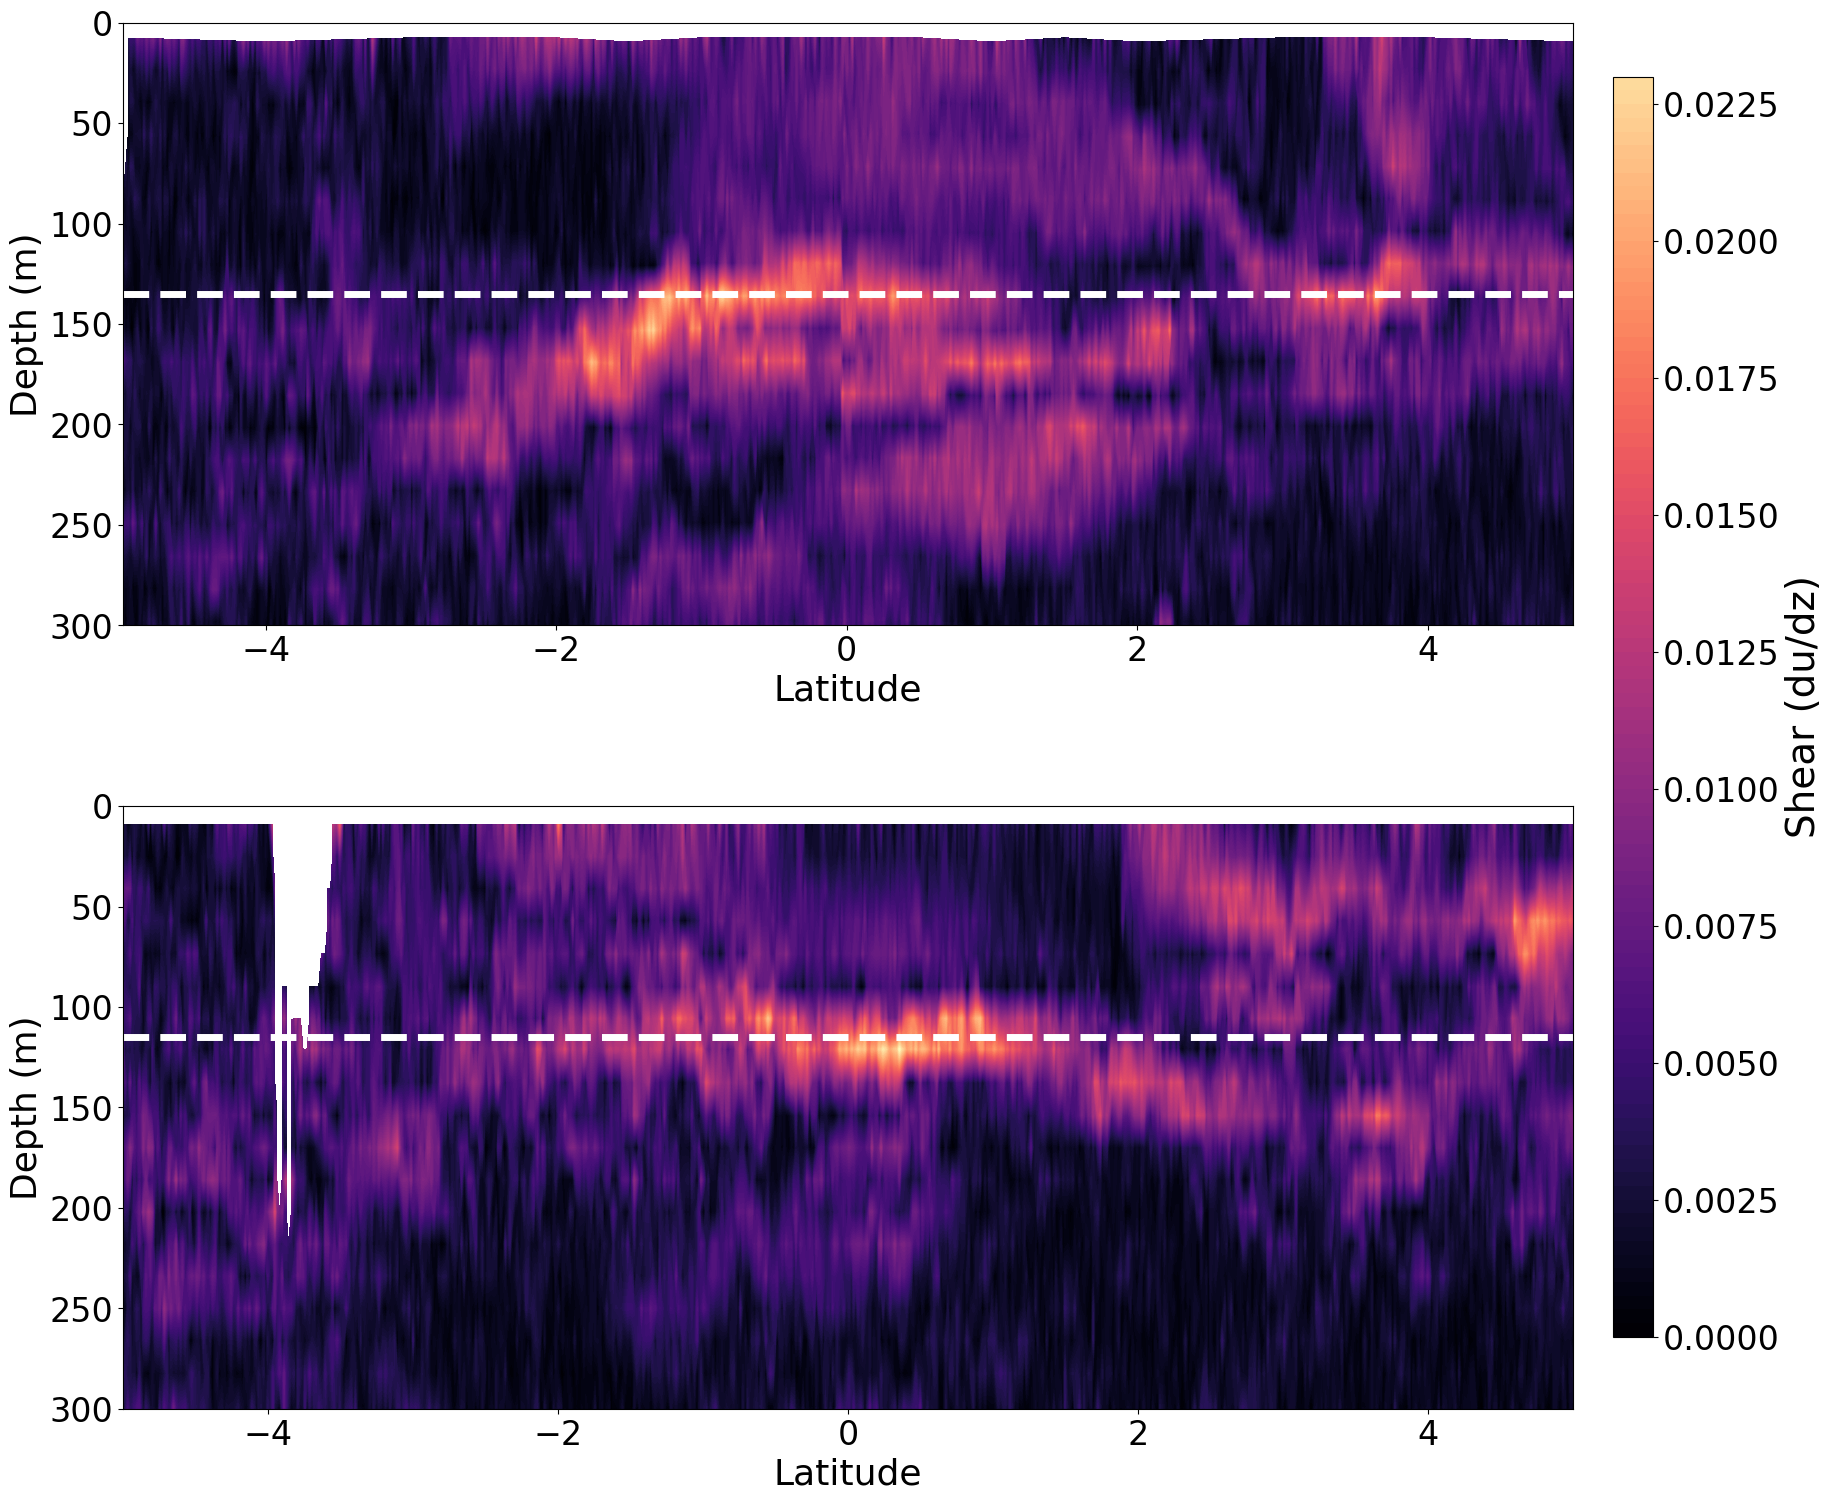

In [9]:
# Create a grid of subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 18))
max_value = max(np.nanmax(shear_2023.values), np.nanmax(shear_2024.values))
min_value = min(np.nanmin(shear_2023.values), np.nanmin(shear_2024.values))

# 2023 zonal velocity
contour1 = ax1.contourf(lat_binned_2023, P_binned_2023, shear_2023, levels=100, cmap='magma', vmax=max_value, vmin = min_value)
ax1.axhline(y=135, color='white', linestyle='--', linewidth = 5)
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Depth (m)')
#ax1.set_title('2023 Zonal Velocity 180 degrees')
ax1.set_ylim(0, 300)
ax1.invert_yaxis()

# 2024 zonal velocity
contour2 = ax2.contourf(lat_binned_2024, P_binned_2024, shear_2024, levels=100, cmap='magma', vmax=max_value, vmin = min_value)
ax2.axhline(y=115, color='white', linestyle='--', linewidth = 5)
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Depth (m)')
#ax2.set_title('2024 Zonal Velocity 167 degrees West')
ax2.set_ylim(0, 300)
ax2.invert_yaxis()

# Adjust the layout to include a common colorbar on the right side
plt.subplots_adjust(right=0.85, hspace=0.3)
cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])
colorbar = plt.colorbar(contour1, cax=cbar_ax)
colorbar.set_label('Shear (du/dz)', fontsize=20+8)
#plt.savefig('Shear.png', dpi=300, bbox_inches='tight')
plt.show()

In [21]:
P_binned_2023

,0,1,2,3,4,5,6,7,8,9,...,620,621,622,623,624,625,626,627,628,629
0,9.500000,9.472905,9.436778,9.400651,9.373556,9.346460,9.310333,9.274206,9.247111,9.220016,...,7.817436,7.790228,7.763019,7.726740,7.690462,7.663253,7.636044,7.599766,7.563487,7.527209
1,24.833333,24.806238,24.770111,24.733984,24.706889,24.679794,24.643667,24.607540,24.580445,24.553349,...,23.150770,23.123561,23.096352,23.060074,23.023795,22.996586,22.969378,22.933099,22.896821,22.860542
2,40.923077,40.898066,40.864718,40.831370,40.806359,40.781348,40.748000,40.714652,40.689641,40.664630,...,39.369941,39.344826,39.319710,39.286222,39.252734,39.227618,39.202502,39.169015,39.135527,39.102039
3,57.000000,56.977421,56.947315,56.917209,56.894630,56.872050,56.841945,56.811839,56.789259,56.766680,...,55.597864,55.575190,55.552516,55.522284,55.492052,55.469378,55.446704,55.416471,55.386239,55.356007
4,73.076923,73.053996,73.023427,72.992858,72.969932,72.947005,72.916436,72.885867,72.862940,72.840014,...,71.653215,71.630193,71.607170,71.576473,71.545775,71.522753,71.499730,71.469033,71.438335,71.407638
5,89.333333,89.306238,89.270111,89.233984,89.206889,89.179794,89.143667,89.107540,89.080445,89.053349,...,87.650770,87.623561,87.596352,87.560074,87.523795,87.496586,87.469378,87.433099,87.396821,87.360542
6,105.384615,105.361689,105.331120,105.300551,105.277624,105.254697,105.224128,105.193559,105.170633,105.147706,...,103.960908,103.937885,103.914862,103.884165,103.853468,103.830445,103.807422,103.776725,103.746028,103.715331
7,121.333333,121.313012,121.285917,121.258821,121.238500,121.218179,121.191083,121.163988,121.143667,121.123345,...,120.071411,120.051004,120.030597,120.003389,119.976180,119.955773,119.935366,119.908158,119.880949,119.853740
8,137.538462,137.517619,137.489829,137.462039,137.441197,137.420354,137.392564,137.364774,137.343932,137.323089,...,136.244182,136.223252,136.202322,136.174416,136.146509,136.125579,136.104649,136.076743,136.048836,136.020930
9,153.500000,153.479679,153.452583,153.425488,153.405167,153.384845,153.357750,153.330655,153.310333,153.290012,...,152.238077,152.217671,152.197264,152.170055,152.142846,152.122440,152.102033,152.074824,152.047615,152.020407


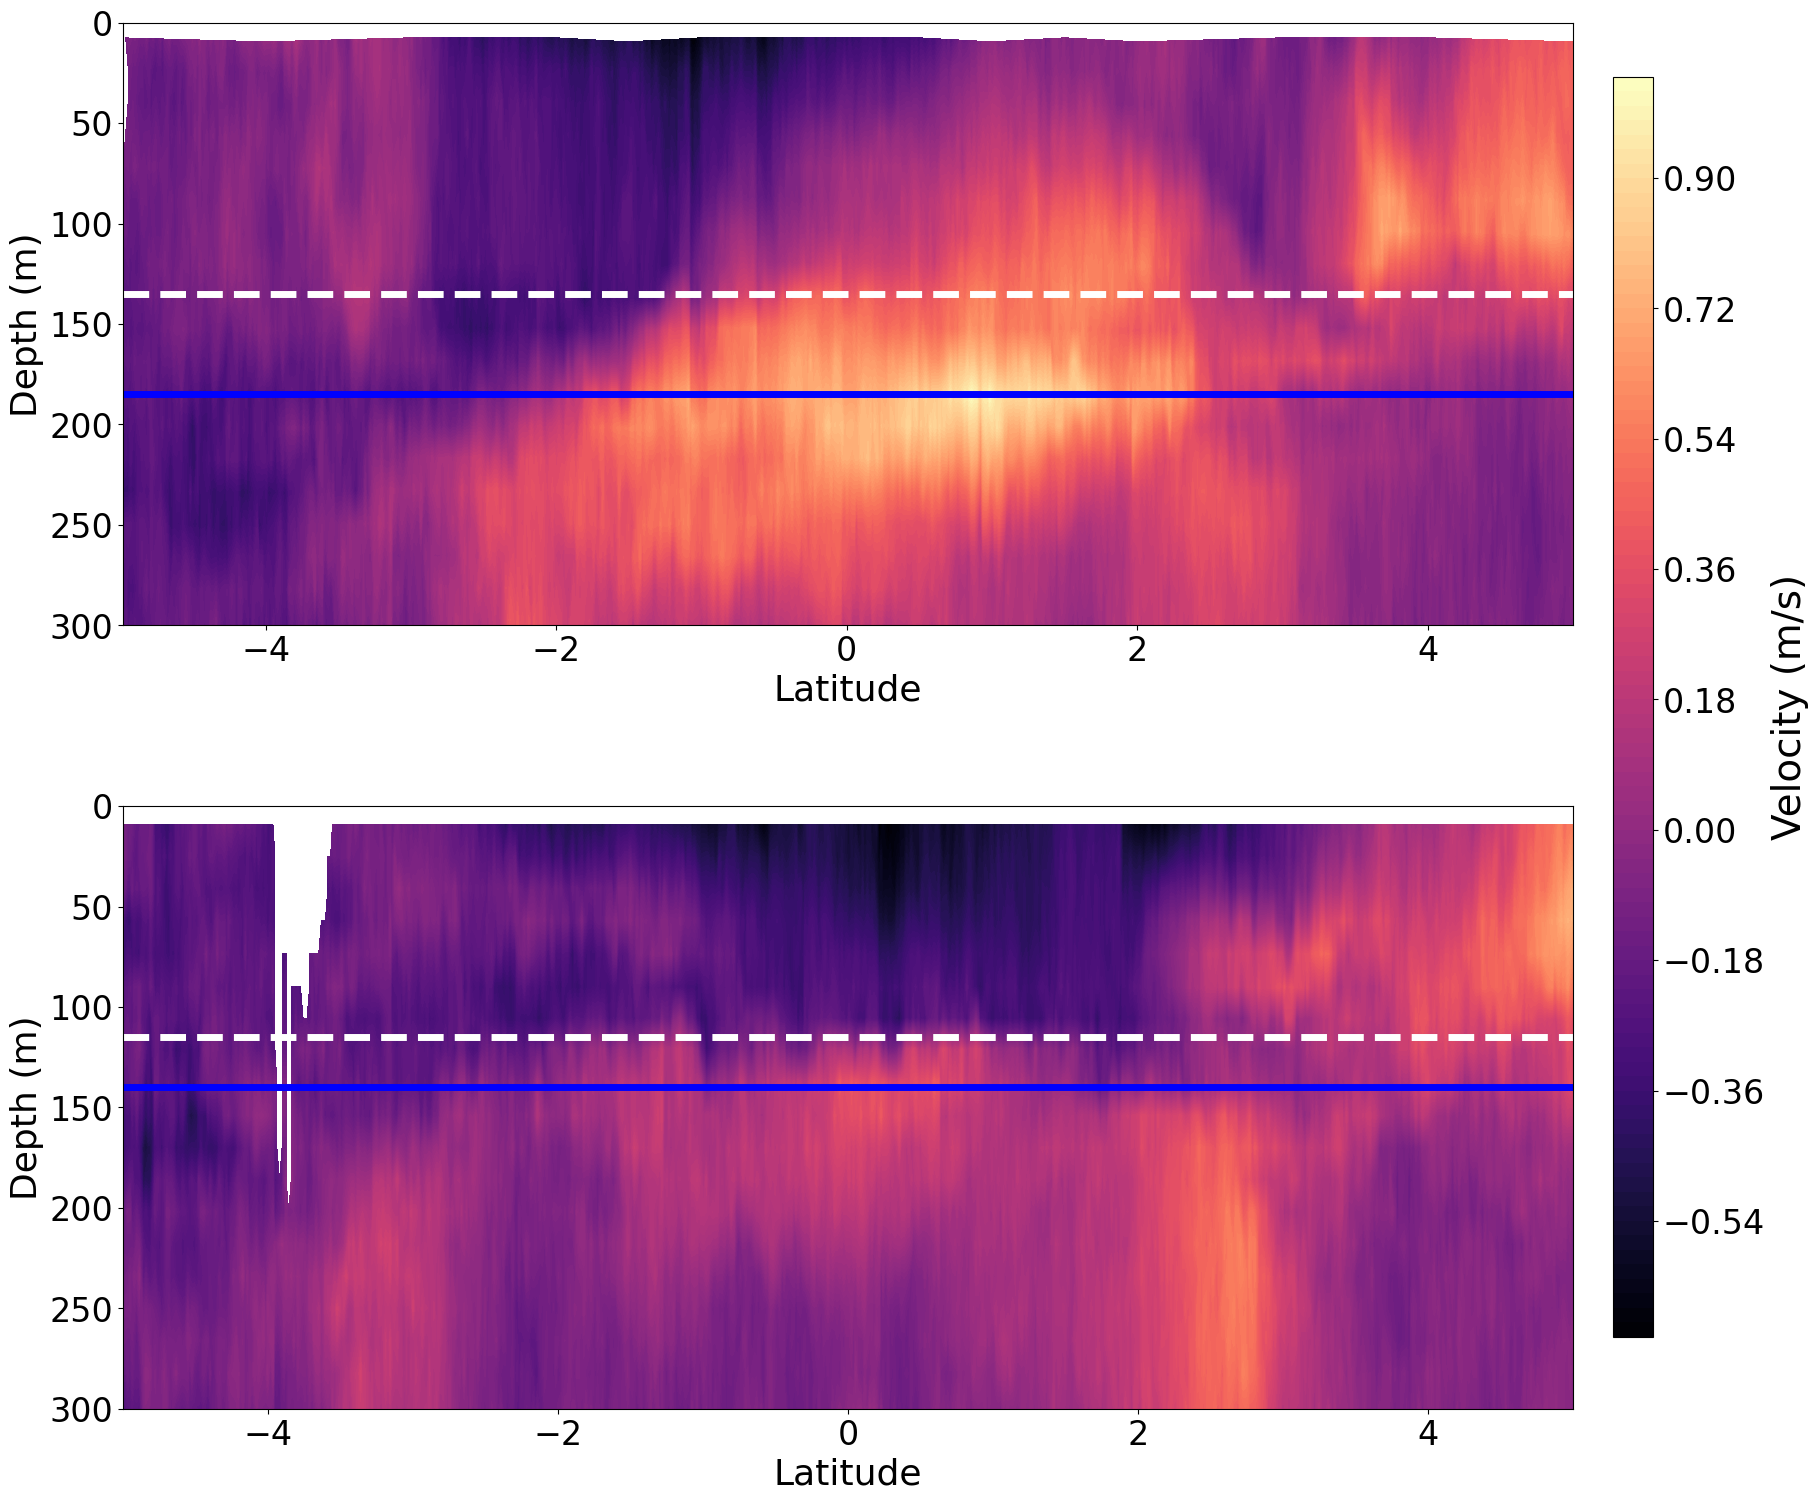

In [10]:
# Create a grid of subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 18))
max_value = max(np.nanmax(u_2023.values), np.nanmax(u_2024.values))
min_value = min(np.nanmin(u_2023.values), np.nanmin(u_2024.values))

# 2023 zonal velocity
contour1 = ax1.contourf(lat_binned_2023, P_binned_2023, u_2023, levels=100, cmap='magma', vmax=max_value, vmin = min_value)
ax1.axhline(y=185, color='blue', linewidth = 5)
ax1.axhline(y=135, color='white', linestyle='--', linewidth = 5)
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Depth (m)')
#ax1.set_title('2023 Zonal Velocity 180 degrees')
ax1.set_ylim(0, 300)
ax1.invert_yaxis()

# 2024 zonal velocity
contour2 = ax2.contourf(lat_binned_2024, P_binned_2024, u_2024, levels=100, cmap='magma', vmax=max_value, vmin = min_value)
ax2.axhline(y=140, color='blue', linewidth = 5)
ax2.axhline(y=115, color='white', linestyle='--', linewidth = 5)
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Depth (m)')
#ax2.set_title('2024 Zonal Velocity 167 degrees West')
ax2.set_ylim(0, 300)
ax2.invert_yaxis()

# Adjust the layout to include a common colorbar on the right side
plt.subplots_adjust(right=0.85, hspace=0.3)
cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])
colorbar = plt.colorbar(contour1, cax=cbar_ax)
colorbar.set_label('Velocity (m/s)', fontsize=20+8)
plt.savefig('Zonal Velocity.png', dpi=300, bbox_inches='tight')
plt.show()


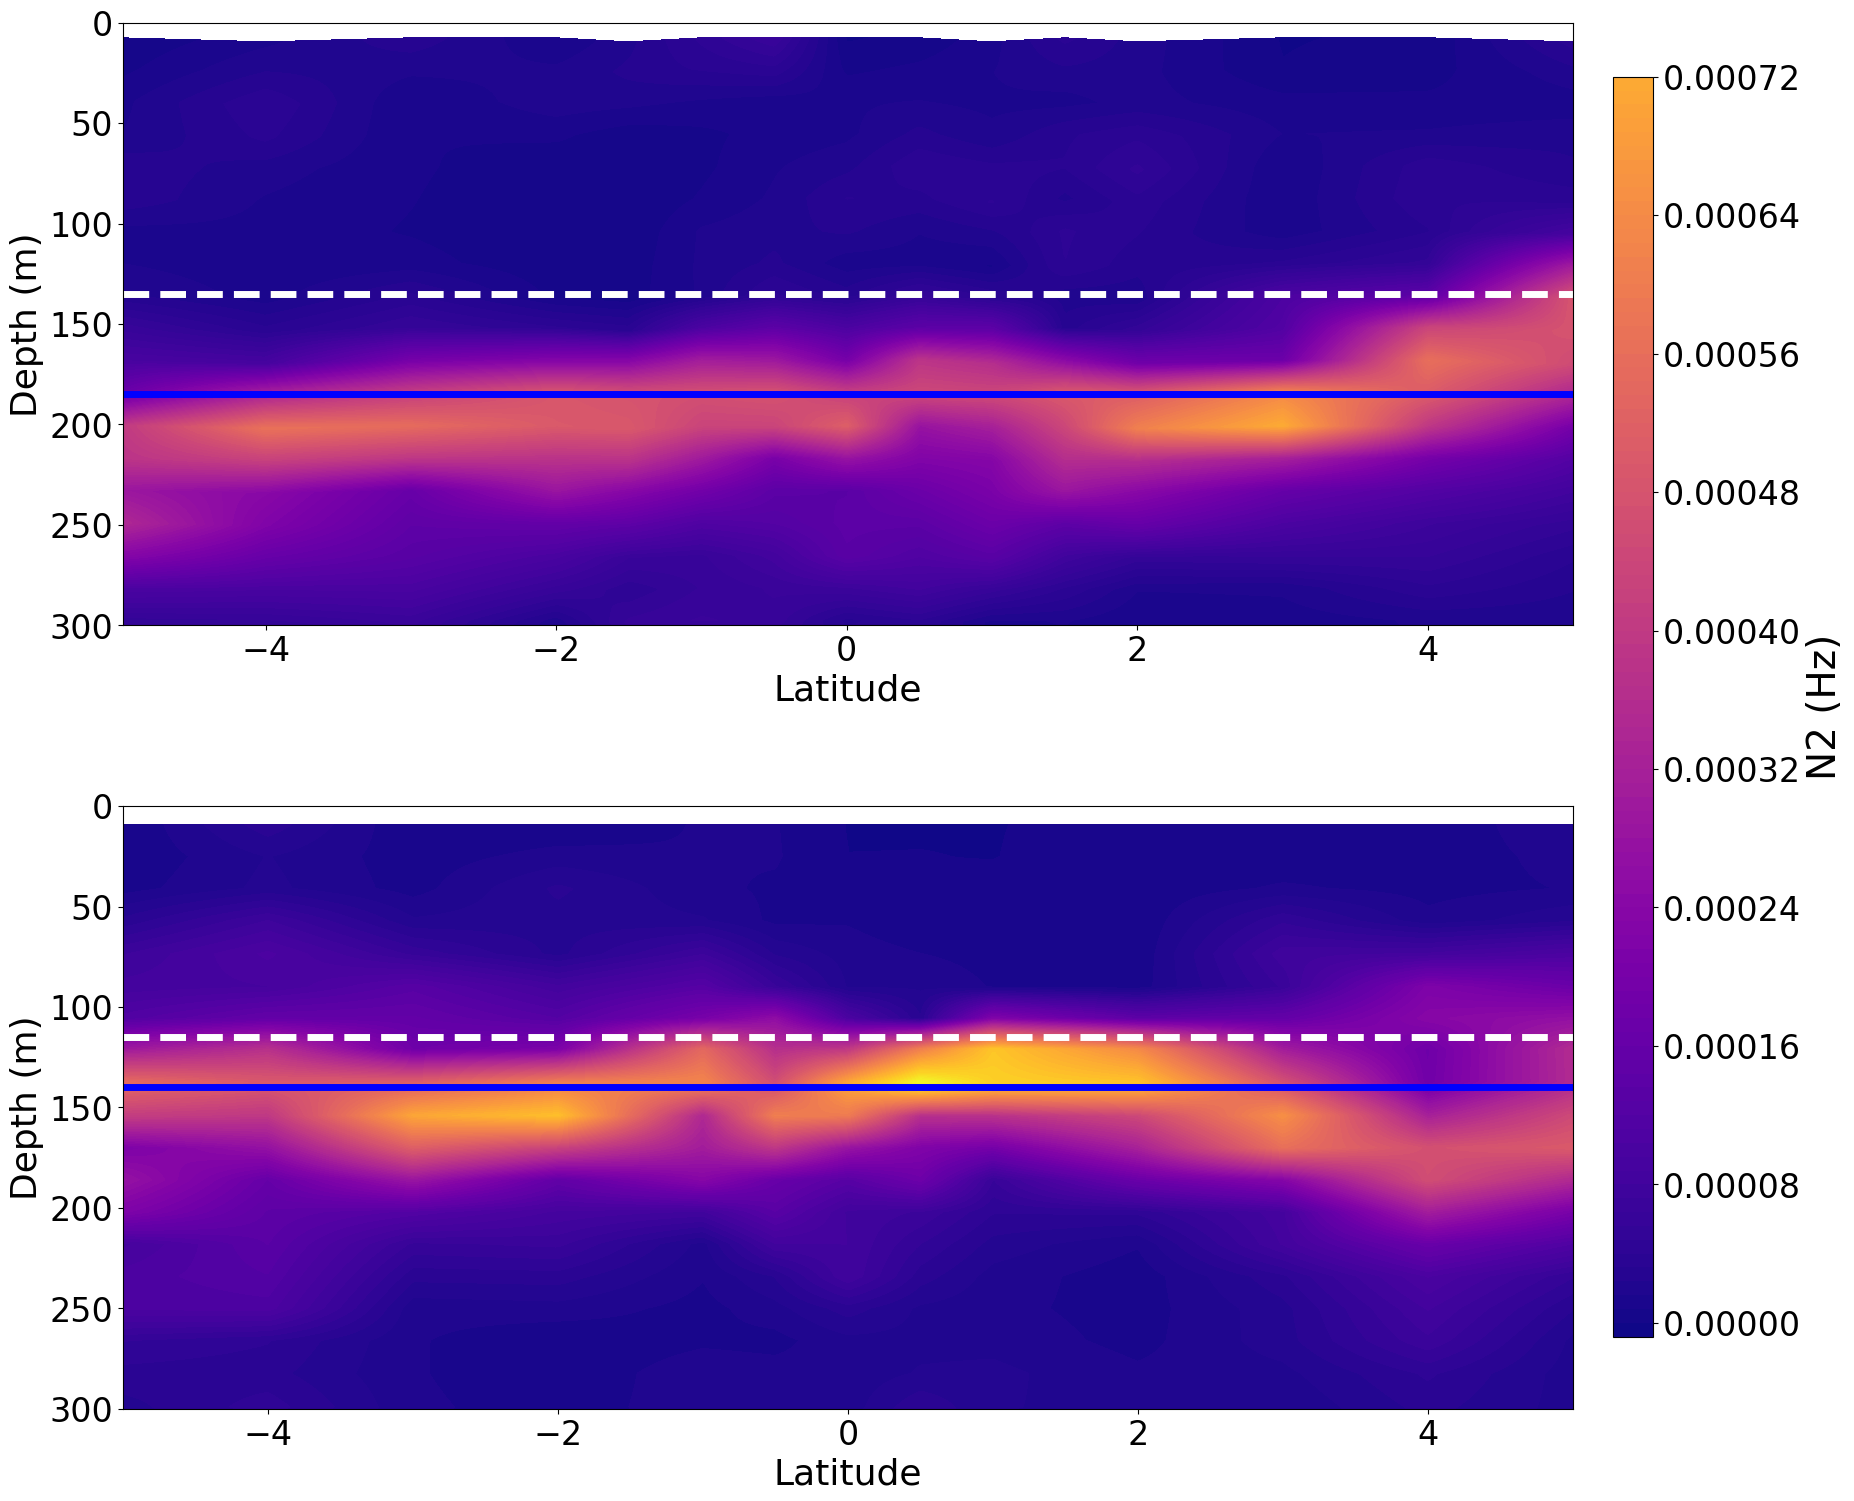

In [11]:
# Create a grid of subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 18))
max_value = max(np.nanmax(N2_2023.values), np.nanmax(N2_2024.values))

# 2023 N2
contour1 = ax1.contourf(lat_binned_2023, P_binned_2023, N2_2023, levels=100, cmap='plasma', vmax=max_value)
ax1.axhline(y=185, color='blue', linewidth = 5)
ax1.axhline(y=135, color='white', linestyle='--', linewidth = 5)
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Depth (m)')
#ax1.set_title('2023 N2 180 degrees')
ax1.set_ylim(0, 300)
ax1.invert_yaxis()

# 2023 N2
contour2 = ax2.contourf(lat_binned_2024, P_binned_2024, N2_2024, levels=100, cmap='plasma', vmax=max_value)
ax2.axhline(y=140, color='blue', linewidth = 5)
ax2.axhline(y=115, color='white', linestyle='--', linewidth = 5)
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Depth (m)')
#ax2.set_title('2024 N2 167 degrees West')
ax2.set_ylim(0, 300)
ax2.invert_yaxis()

# Adjust the layout to include a common colorbar on the right side
plt.subplots_adjust(right=0.85, hspace=0.3)
cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])
colorbar = plt.colorbar(contour1, cax=cbar_ax)
colorbar.set_label('N2 (Hz)', fontsize=20+8)

plt.savefig('N2.png', dpi=300, bbox_inches='tight')

plt.show()

# signal from the thermocline above

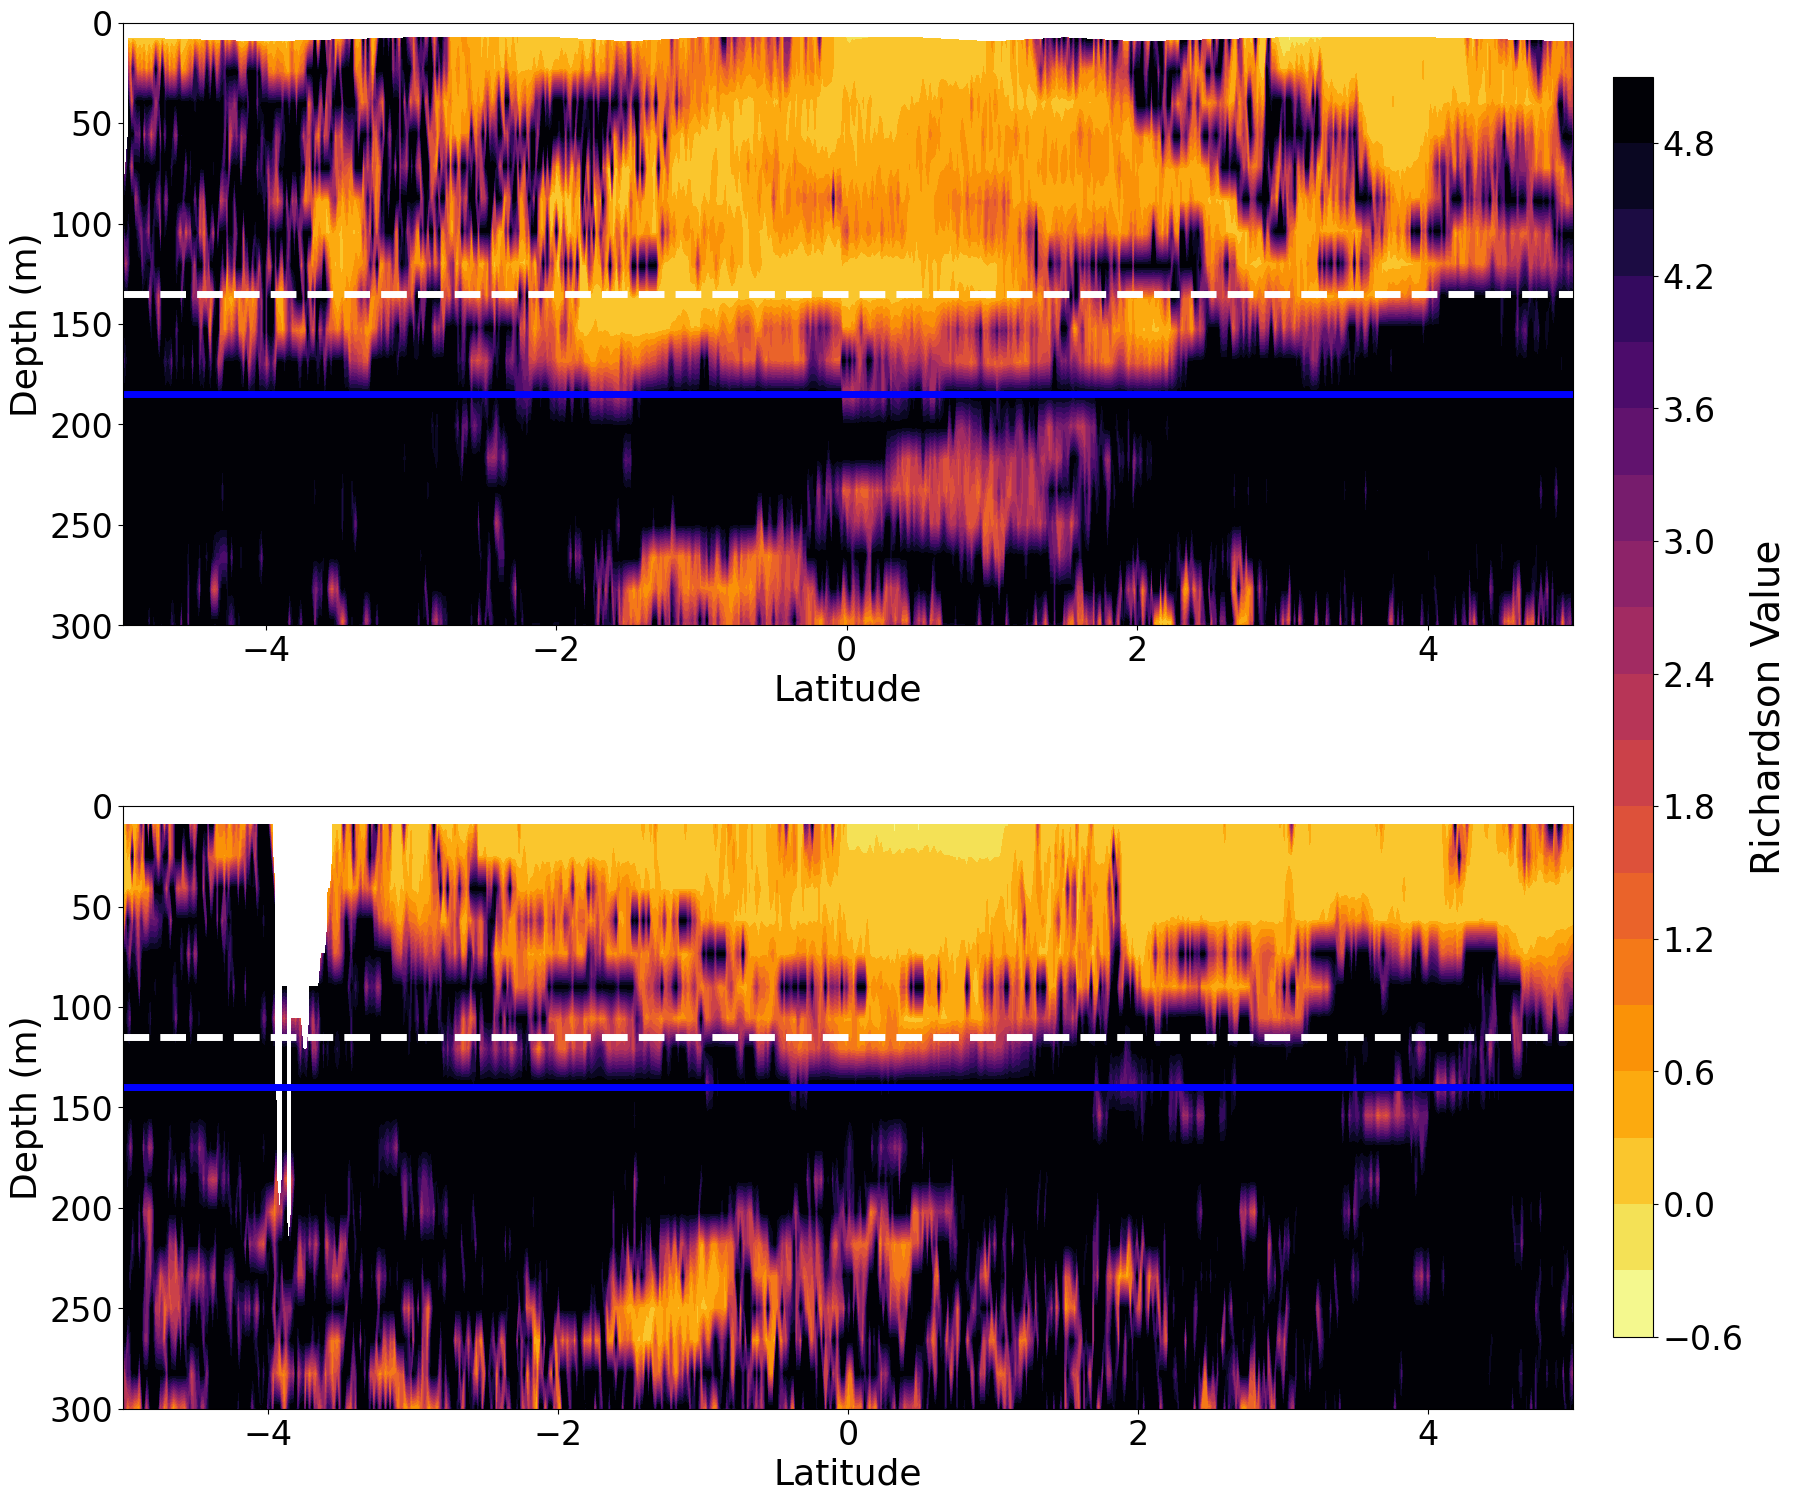

In [12]:
# Create a grid of subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 18))


visualize_ri_2023 = ri_2023.clip(lower = -0.5, upper=5) # aide visualization
visualize_ri_2024 = ri_2024.clip(lower = -0.5, upper=5) # aide visualization

max_value = max(np.nanmax(visualize_ri_2023.values), np.nanmax(visualize_ri_2024.values))

# 2023 ri
contour1 = ax1.contourf(lat_binned_2023, P_binned_2023, visualize_ri_2023, levels=20, cmap='inferno_r', vmax=max_value)
ax1.axhline(y=185, color='blue', linewidth = 5)
ax1.axhline(y=135, color='white', linestyle='--', linewidth = 5)
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Depth (m)')
#ax1.set_title('2023 Richardson Numbers 180 degrees')
ax1.set_ylim(0, 300)
ax1.invert_yaxis()

# 2024 ri
contour2 = ax2.contourf(lat_binned_2024, P_binned_2024, visualize_ri_2024, levels=20, cmap='inferno_r', vmax=max_value)
ax2.axhline(y=140, color='blue', linewidth = 5)
ax2.axhline(y=115, color='white', linestyle='--', linewidth = 5)
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Depth (m)')
#ax2.set_title('2024 Richardson Numbers 167 degrees West')
ax2.set_ylim(0, 300)
ax2.invert_yaxis()

# Adjust the layout to include a common colorbar on the right side
plt.subplots_adjust(right=0.85, hspace=0.3)
cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])
colorbar = plt.colorbar(contour1, cax=cbar_ax)
colorbar.set_label('Richardson Value', fontsize=20+8)

plt.savefig('Ri.png', dpi=300, bbox_inches='tight')

plt.show()

In [48]:
np.shape(ri_2023)
np.shape(ri_2024)

(40, 630)

In [10]:
# eliminate surface mixing by removing top 50 meters
ri_2023_metrics_1 = ri_2023.drop(ri_2023.index[:2])
ri_2024_metrics_1 = ri_2024.drop(ri_2024.index[:2])

# eliminate skewing of metrics by removing below EUC max.
ri_2023_metrics = ri_2023_metrics_1.drop(ri_2023_metrics_1.index[10:])
ri_2024_metrics = ri_2024_metrics_1.drop(ri_2024_metrics_1.index[8:])

In [11]:
ri_2023_metrics.columns = range(len(ri_2023_metrics.columns))
ri_2024_metrics.columns = range(len(ri_2024_metrics.columns))

In [12]:
ri_2023_metrics = ri_2023_metrics.iloc[:, 252:378]
ri_2024_metrics = ri_2024_metrics.iloc[:, 252:378]

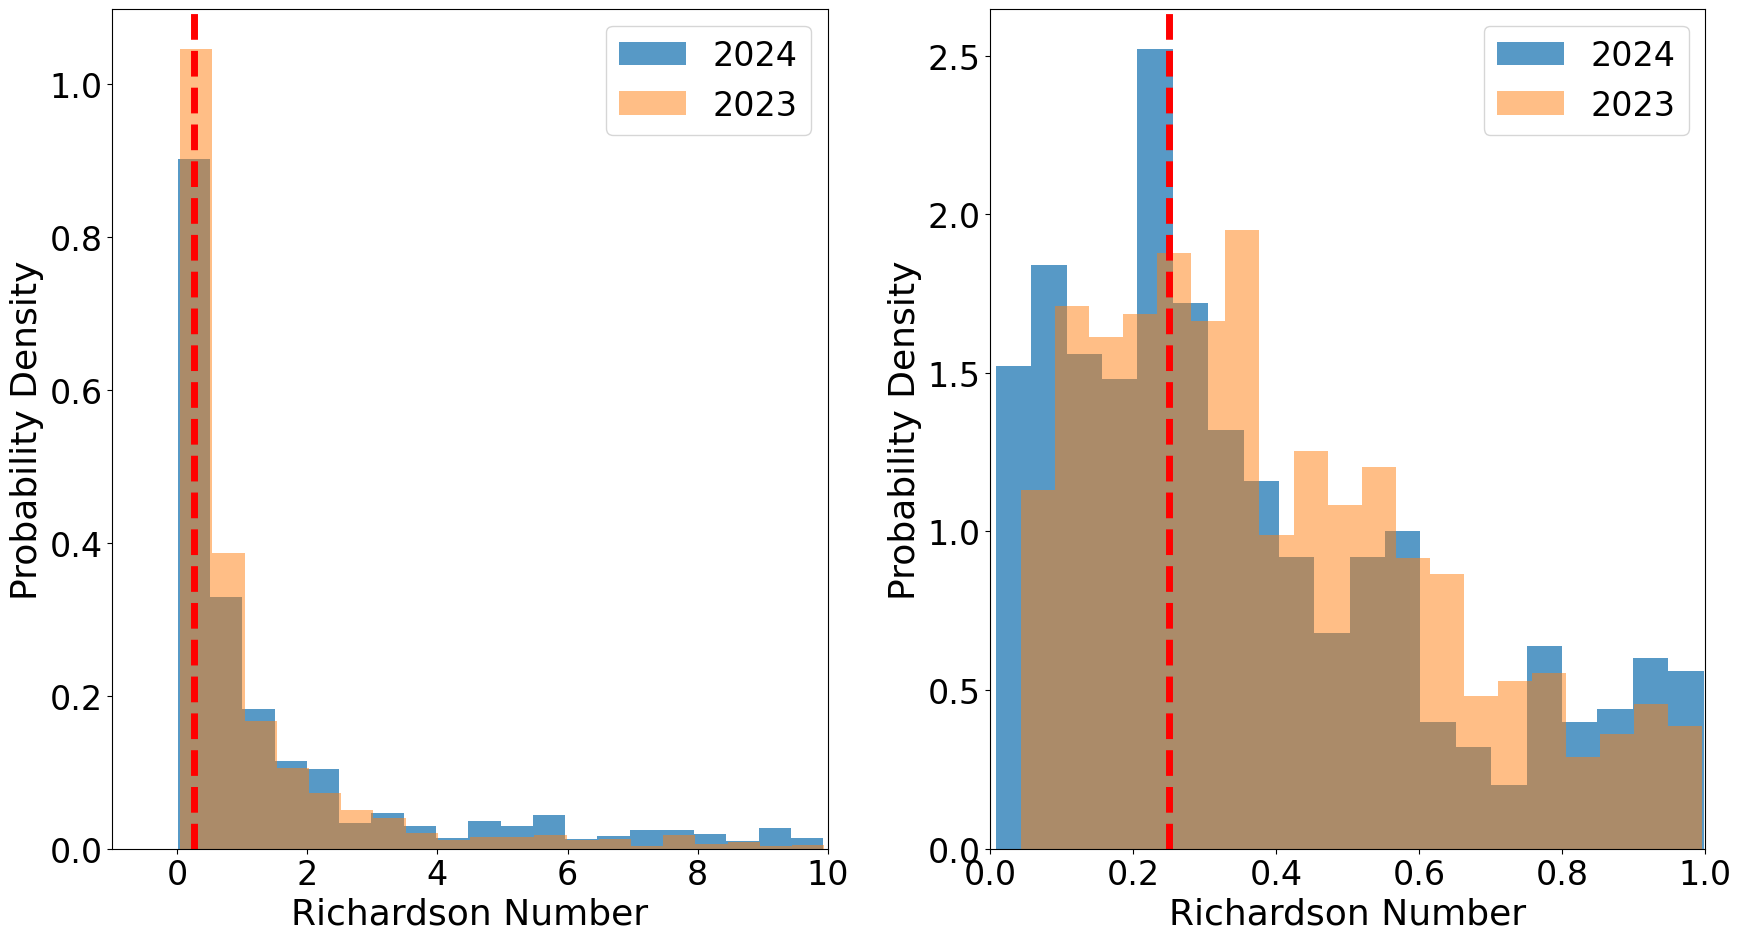

In [19]:
ri_crit_2023 = ri_2023_metrics.stack().loc[ri_2023_metrics.stack() <= 10].tolist()
ri_crit_2024 = ri_2024_metrics.stack().loc[ri_2024_metrics.stack() <= 10].tolist()

fig, axs = plt.subplots(1, 2, figsize=(18, 10), sharey=False)

# Plot PDF
axs[0].hist(ri_crit_2024, bins=20, density=True, alpha=0.75, label = '2024')
axs[0].hist(ri_crit_2023, bins=20, density=True, alpha=0.5, label = '2023')
axs[0].axvline(x=0.25, color='red', linestyle='dashed', linewidth=5)
axs[0].set_ylabel('Probability Density')
axs[0].set_xlabel('Richardson Number')
axs[0].set_xlim(-1, 10)
#axs[0].set_title('Richardson Distribution')
axs[0].legend(loc='upper right')

ri_crit_2023 = ri_2023_metrics.stack().loc[ri_2023_metrics.stack() <= 1].tolist()
ri_crit_2024 = ri_2024_metrics.stack().loc[ri_2024_metrics.stack() <= 1].tolist()

# Plot PDF zoomed in 
axs[1].hist(ri_crit_2024, bins=20, density=True, alpha=0.75, label = '2024')
axs[1].hist(ri_crit_2023, bins=20, density=True, alpha=0.5, label = '2023')
axs[1].axvline(x=0.25, color='red', linestyle='dashed', linewidth=5)
axs[1].set_ylabel('Probability Density')
axs[1].set_xlabel('Richardson Number')
axs[1].set_xlim(0, 1)
#axs[1].set_title('')
axs[1].legend(loc='upper right')

#plt.savefig('Ri_Histogram.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()